# Capstone Webscrapping Ethereum Website using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Notebook ini dibuat sebagai Final Project saya, **Irdiansyah** di Data Analytics Specialization bersama Algoritma. Capstone ini khususnya mencoba menarik data web yang dipublikasikan secara bebas, yang biasa disebut Webscrapping. Kali ini saya akan menarik Data Volume Penjualan Ethereum.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":1,"applicationTime":195,"agent":""}</script>\n<script>(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NR'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
# find parent table

table = soup.find('tbody')
print(table.prettify()[0:500])
row_length = len(table)

<tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-30
  </th>
  <td class="text-center">
   $253,607,549,372
  </td>
  <td class="text-center">
   $27,149,143,847
  </td>
  <td class="text-center">
   $2,169.40
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-29
  </th>
  <td class="text-center">
   $243,040,539,437
  </td>
  <td class="text-center">
   $30,629,329,806
  </td>
  <td class="te


In [6]:
row_length

1095

In [7]:
# cari Date
table.find_all('th', attrs={'scope':'row'})[0].text

'2021-06-30'

In [8]:
# cari Volume
table.select("tr > td:nth-of-type(2)")[0].text

'\n$27,149,143,847\n'

Finding row length.

In [9]:
# panjang row date

row_date = table.find_all('th')
row_date_length = len(row_date)
row_date_length

547

In [10]:
# panjang row volume

row_volume = table.select("tr > td:nth-of-type(2)")
row_volume_length = len(row_volume)
row_volume_length

547

Setelah menemukan kode yang tepat untuk menarik data yang tepat dengan .find( ) dan .select( ), kemudian dilihat dan disesuikan panjang barisnya. Selanjutnya di bagian ini data akan dijadikan dua kolom yang diminta, yaitu date dan volume.

In [11]:
temp = [] #initiating a tuple

for i in range(0, row_date_length):
    #get dates
    date = table.find_all('th', attrs={'scope':'row'})[i].text
    date = date.strip()
    #get volume
    volume = table.select("tr > td:nth-of-type(2)")[i].text
    volume = volume.strip()
    
    temp.append((date,volume))
    
temp

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

## Creating data frame & Data wrangling

Setelah kolom date dan volume dibuat. Tahapan selanjutnya adalah memasukkan dua kolom tersebut menjadi Pandas data frame.

In [32]:
import pandas as pd

dfr = pd.DataFrame(temp, columns = ('date','volume'))
dfr.head()

,date,volume
0,2021-06-30,"$27,149,143,847"
1,2021-06-29,"$30,629,329,806"
2,2021-06-28,"$24,316,408,028"
3,2021-06-27,"$24,249,510,321"
4,2021-06-26,"$25,981,381,067"


Periksa data type

In [28]:
dfr.dtypes

date      object
volume    object
dtype: object

Mengganti data type

In [33]:
dfr['date'] = dfr['date'].astype('datetime64')
dfr['volume'] = dfr['volume'].str.replace(",", "").str.replace("$", "")
dfr['volume'] = dfr['volume'].astype('float64')

dfr.dtypes

/var/folders/x_/1h27z5411yggd3zgcv_9_cmh0000gn/T/ipykernel_2542/3858882649.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dfr['volume'] = dfr['volume'].str.replace(",", "").str.replace("$", "")


date      datetime64[ns]
volume           float64
dtype: object

Untuk data visualisasi, tahap awal kolom date diubah menjadi index

In [34]:
dfr = dfr.set_index('date')
dfr.head()

,volume
date,
2021-06-30,2.714914e+10
2021-06-29,3.062933e+10
2021-06-28,2.431641e+10
2021-06-27,2.424951e+10
2021-06-26,2.598138e+10


<AxesSubplot:xlabel='date'>

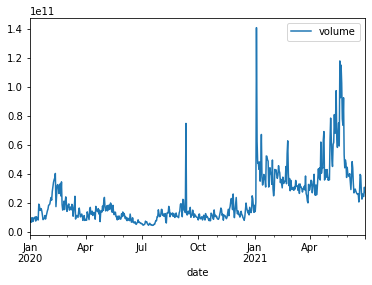

In [35]:
dfr.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='date'>

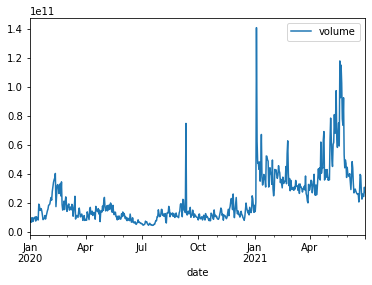

In [36]:
dfr.plot()

Berikut ini ada hasil visualisasi data Volume Penjualan Ethereum: 
- Melalui data dapat diketahui bahwa volume penjualan tertinggi ada di bulan Januari 2021 yaitu $140,906,534,191.

### Extra Challange

<AxesSubplot:>

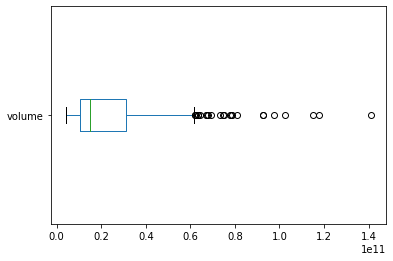

In [37]:
dfr.plot(kind='box', vert=False)

- Dari median: Rata-rata volume saham ETH (bedasarkan median) sekitar 15 milyar USD 
- Dari lebar kotak (IQR atau selisih 75% dengan 25%): IQR sekitar 20 milyar USD
- Cukup banyak outlier yang berada di atas, dengan nilai tertinggi sekitar 140 milyar USD
- Rentang outlier lebih besar dari rentang data

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.